**Problema del encuentro**

Dos personas han quedado citadas en un determinado lugar. Ambos tienen la misma probabilidad de llegar al lugar de la cita en el intevalo de tiempo .

Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10.
Solución mediante simulación (**Metodología de la Simulación**)
1. Identifique las variables.
 
 x= tiempo de llegada de la persona 1
 y= tiempo de llegada de la persona 2 

2. Determine la distribución de probabilidad de cada variable 
3.  modele las variables aleatorias

Por la descripción del probelma sabemos que las variables sigen una distribucion uniforme:

$x \sim U(0,30)$ ; $y \sim U(0,30)$
4. Defina el modelo del sistema y los objetivos de la simulación 

La diferencia $x - y> 10$ modela adecuadamente el sistema.

Si $x - y> 10$  el tiempo de que una persona espere a la otra es mayor a 10, si no es asi el tiempo maximo de espera es 10.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una estimación de la probabilidad y por tanto su complemento.



In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [48]:
def espera():                #Esta función devuelve el valor 1 si el tiempo de espera es mayor a 10 o 0 si no.
    llegada=0                      
    x = random.uniform(0, 30) 
    y = random.uniform(0, 30)  
    if 10 < abs(x - y):
        llegada += 1
    return llegada

In [50]:
espera()


0

5. Diseñe el experimento

Ejecutamos  n  veces la función anterior y calculamos de manera acumulativa la probabilidad de llegada.

In [41]:
def prob_espera(n):                    
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += espera()
        prob.append(inter/(i+1))
    return prob
   
  

In [63]:
X = prob_espera(1000)
print(np.mean(X), np.std(X))
print("La probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 es: ",(1-(np.mean(X)) ))

0.45584789021006666 0.026920580898863934
La probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 es:  0.5441521097899333


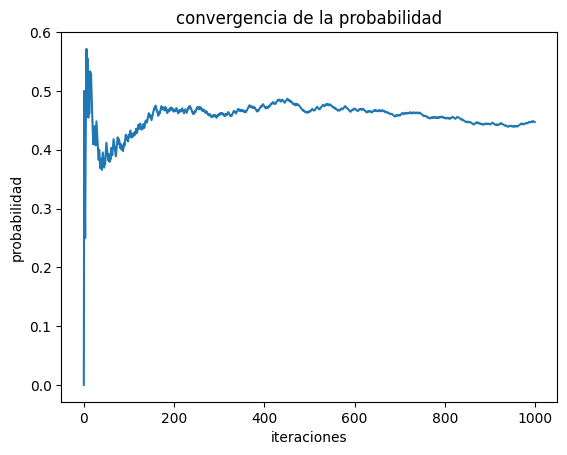

In [65]:
plt.plot(X)  # La gráfica muestra que la convergencia está garantizada con 1000 iteraciones
plt.title('convergencia de la probabilidad')
plt.xlabel('iteraciones') 
plt.ylabel('probabilidad') 
plt.show() 

6. Repita el experimento  n  veces

In [66]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_espera(500)
        lista.append(np.mean(s))
    return lista

In [72]:
z=modelo(500)

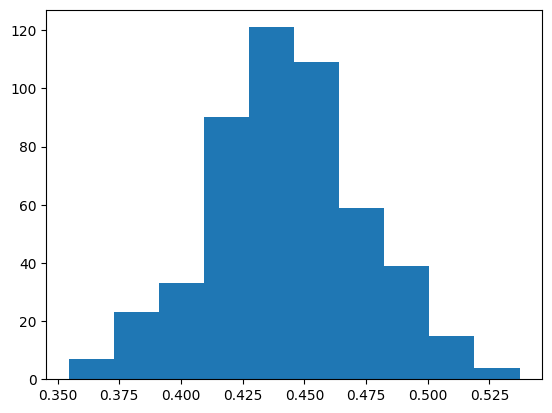

In [73]:
plt.hist(z)
plt.show()

In [76]:
np.mean(z)
np.std(z)
print((1-(np.mean(z))),np.std(z))

0.5569467520848171 0.03118450173941714


 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [79]:
(1-(np.mean(z))) - 1.96*np.std(z)/np.sqrt(200),(1-(np.mean(z)))  + 1.96*np.std(z)/np.sqrt(200)

(0.5526248006458355, 0.5612687035237988)

# Analiticamente
La probabilidad de que el tiempo que una persona espere a la otra sea como máximo de 10 minutosesta dado por $P(|X-Y| \leq 10)$.
Como sabemos las llegadas son independientes y uniformemente distribuidas 
Entonces resolviendo:


$$P(|X-Y| \leq 10) = \iint_{|x-y|\leq10} f_{X,Y}(x,y) \, dx\, dy$$


donde $f_{X,Y}(x,y)$ es la función conjunta de densidad de probabilidad de $X$ y $Y$.

Como $X$, $Y$ son independientes, la función conjunta de densidad de probabilidad de $X$,$Y$ es simplemente el producto de sus funciones de densidad de probabilidad individuales. Por lo tanto:


$$f_{X,Y}(x,y) = f_X(x) \cdot f_Y(y) = \frac{1}{30^2} \qquad 0 \leq x,y \leq 30$$

Así necesitamos resolver:

$$P(|X-Y| \leq 10) = \frac{1}{30^2} \left[\int_{0}^{10}\int_{0}^{x+10}  \, dy\, dx  +  \int_{10}^{20}\int_{x-10}^{x+10}  \, dy\, dx  + \int_{20}^{30}\int_{x-10}^{30}  \, dy\, dx\right] $$

Finalmente:
$$P(|X-Y| \leq 10) = 0.5555$$
por simplicidad la integral fue resuelta por un programa 